In [ ]:
import numpy as np
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from keras.datasets import mnist

In [ ]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


In [ ]:
train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32') / 255

In [ ]:
train_labels = tf.keras.utils.to_categorical(train_labels)
test_labels = tf.keras.utils.to_categorical(test_labels)

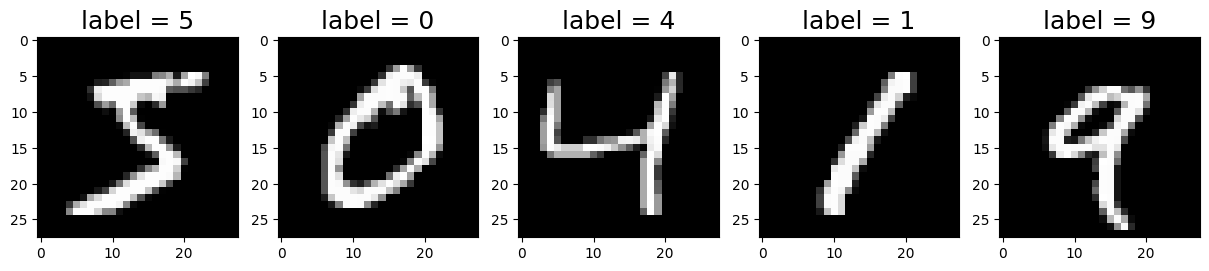

In [ ]:
import matplotlib.pyplot as plt

plt.gcf().set_size_inches(15, 4)
for i in range(5):
    ax = plt.subplot(1, 5, i+1)
    ax.imshow(train_images[i], cmap='gray')
    ax.set_title('label = ' + str(np.argmax(train_labels[i])), fontsize=18)
plt.show()

In [ ]:
model = Sequential()
# model.add(Flatten(input_shape=(28, 28, 1)))
# model.add(Dense(128, activation='relu'))
# model.add(Dense(64, activation='relu'))
# model.add(Dense(10, activation='softmax'))

model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.build(input_shape=(28, 28))
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 flatten_1 (Flatten)         (None, 576)              

In [ ]:
model.fit(train_images, train_labels, epochs=5, batch_size=64)

Epoch 1/5
938/938 [==============================] - 12s 6ms/step - loss: 0.1851 - accuracy: 0.9437
Epoch 2/5
938/938 [==============================] - 4s 5ms/step - loss: 0.0499 - accuracy: 0.9846
Epoch 3/5
938/938 [==============================] - 4s 5ms/step - loss: 0.0342 - accuracy: 0.9895
Epoch 4/5
938/938 [==============================] - 5s 5ms/step - loss: 0.0269 - accuracy: 0.9910
Epoch 5/5
938/938 [==============================] - 4s 5ms/step - loss: 0.0236 - accuracy: 0.9926


In [ ]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Test accuracy:', test_acc)

313/313 [==============================] - 1s 3ms/step - loss: 0.0271 - accuracy: 0.9913
Test accuracy: 0.9912999868392944


313/313 [==============================] - 1s 3ms/step


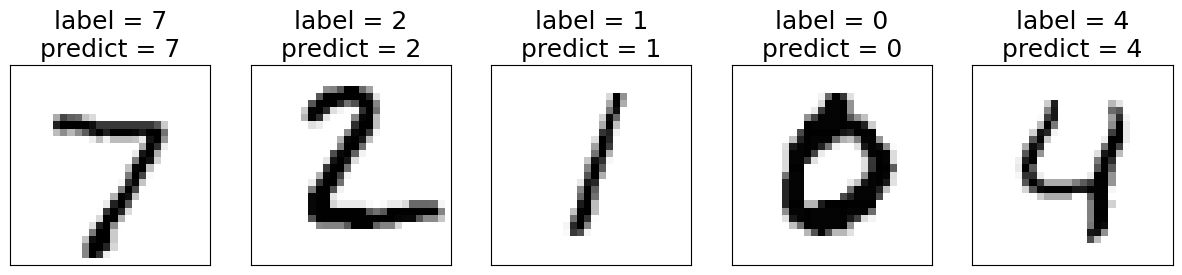

In [ ]:
predict = model.predict(test_images)
predict = predict.round(1)
predict = np.argmax(predict, axis=1)

plt.gcf().set_size_inches(15, 4)
for i in range(5):
    ax = plt.subplot(1, 5, i+1)
    ax.imshow(test_images[i], cmap='binary')
    ax.set_title('label = ' + str(np.argmax(test_labels[i])) + '\n' + 'predict = ' + str(predict[i]), fontsize=18)
    ax.set_xticks([])
    ax.set_yticks([])
plt.show()

In [ ]:
model.save('mnist_model.h5')